# Harmonic mean, Log sum comparison - simulations


In [1]:
import itertools
import numpy as np
from math import log, exp

StatementMeta(, 29d97a8d-5232-44b3-93a7-e4b4482144f7, 3, Finished, Available, Finished)

In [2]:

factors = {
    "Factor1": {"values": ["A", "B", "C"], "probs": [0.2, 0.3, 0.5]},
    "Factor2": {"values": ["X", "Y"], "probs": [0.6, 0.4]},
    "Factor3": {"values": ["P", "Q"], "probs": [0.7, 0.3]},
    "Factor4": {"values": ["K", "L", "M"], "probs": [0.4, 0.4, 0.2]},
    "Factor5": {"values": ["Z"], "probs": [1.0]},  # Single value, deterministic
    "Factor6": {"values": ["T", "U"], "probs": [0.5, 0.5]},
    "Factor7": {"values": ["G", "H"], "probs": [0.8, 0.2]},
    "Factor8": {"values": ["I", "J"], "probs": [0.6, 0.4]},
    "Factor9": {"values": ["O", "P"], "probs": [0.3, 0.7]},
    "Factor10": {"values": ["V", "W"], "probs": [0.9, 0.1]},
}

StatementMeta(, 29d97a8d-5232-44b3-93a7-e4b4482144f7, 4, Finished, Available, Finished)

In [3]:
# Get all possible combinations of factor values
factor_names = list(factors.keys())
factor_values = [factors[f]["values"] for f in factor_names]
all_combinations = list(itertools.product(*factor_values))

def joint_probability_simple(probs):
    """Method 1: Calculate joint probability by multiplying probabilities."""
    joint_prob = np.prod(probs)
    return joint_prob

def joint_probability_logarithmic(probs):
    """Method 2: Calculate joint probability using logarithmic sum."""
    log_sum = np.sum([log(p) for p in probs])
    return exp(log_sum)

def joint_probability_harmonic(probs):
    """Method 3: Calculate joint probability using harmonic mean."""
    harmonic_mean = len(probs) / np.sum([1.0/p for p in probs])
    return harmonic_mean

StatementMeta(, 29d97a8d-5232-44b3-93a7-e4b4482144f7, 5, Finished, Available, Finished)

In [4]:

results = []
for combination in all_combinations:
    
    probs = [factors[factor_names[i]]["probs"][factors[factor_names[i]]["values"].index(combination[i])] for i in range(len(combination))]
    joint_prob_simple = joint_probability_simple(probs)
    joint_prob_logarithmic = joint_probability_logarithmic(probs)
    joint_prob_harmonic = joint_probability_harmonic(probs)
    
    results.append({
        "Combination": combination,
        "Joint_Prob_Simple": joint_prob_simple,
        "Joint_Prob_Logarithmic": joint_prob_logarithmic,
        "Joint_Prob_Harmonic": joint_prob_harmonic,
    })


StatementMeta(, 29d97a8d-5232-44b3-93a7-e4b4482144f7, 6, Finished, Available, Finished)

REsults

In [5]:
for res in results:
    print(f"Combination: {res['Combination']}")
    print(f"Simple Method: {res['Joint_Prob_Simple']:.10f}, Logarithmic Method: {res['Joint_Prob_Logarithmic']:.10f}, Harmonic Method: {res['Joint_Prob_Harmonic']:.10f}")
    print("-" * 80)

StatementMeta(, 29d97a8d-5232-44b3-93a7-e4b4482144f7, 7, Finished, Available, Finished)

Combination: ('A', 'X', 'P', 'K', 'Z', 'T', 'G', 'I', 'O', 'V')
Simple Method: 0.0021772800, Logarithmic Method: 0.0021772800, Harmonic Method: 0.4771823518
--------------------------------------------------------------------------------
Combination: ('A', 'X', 'P', 'K', 'Z', 'T', 'G', 'I', 'O', 'W')
Simple Method: 0.0002419200, Logarithmic Method: 0.0002419200, Harmonic Method: 0.3350618269
--------------------------------------------------------------------------------
Combination: ('A', 'X', 'P', 'K', 'Z', 'T', 'G', 'I', 'P', 'V')
Simple Method: 0.0050803200, Logarithmic Method: 0.0050803200, Harmonic Method: 0.5248906478
--------------------------------------------------------------------------------
Combination: ('A', 'X', 'P', 'K', 'Z', 'T', 'G', 'I', 'P', 'W')
Simple Method: 0.0005644800, Logarithmic Method: 0.0005644800, Harmonic Method: 0.3579037069
--------------------------------------------------------------------------------
Combination: ('A', 'X', 'P', 'K', 'Z', 'T', 'G',

# Adding threshold function and adjusted probability

Recaulctulating with thresholds

In [6]:
factors = {
    "Factor1": {"values": ["A", "B", "C"], "probs": [0.2, 0.3, 0.5], "threshold1": 0.25, "threshold2": 0.45},
    "Factor2": {"values": ["X", "Y"], "probs": [0.6, 0.4], "threshold1": 0.35, "threshold2": 0.55},
    "Factor3": {"values": ["P", "Q"], "probs": [0.7, 0.3], "threshold1": 0.25, "threshold2": 0.6},
    "Factor4": {"values": ["K", "L", "M"], "probs": [0.4, 0.4, 0.2], "threshold1": 0.3, "threshold2": 0.5},
    "Factor5": {"values": ["Z"], "probs": [1.0], "threshold1": 0.5, "threshold2": 0.9},
    "Factor6": {"values": ["T", "U"], "probs": [0.5, 0.5], "threshold1": 0.3, "threshold2": 0.7},
    "Factor7": {"values": ["G", "H"], "probs": [0.8, 0.2], "threshold1": 0.3, "threshold2": 0.6},
    "Factor8": {"values": ["I", "J"], "probs": [0.6, 0.4], "threshold1": 0.35, "threshold2": 0.55},
    "Factor9": {"values": ["O", "P"], "probs": [0.3, 0.7], "threshold1": 0.25, "threshold2": 0.6},
    "Factor10": {"values": ["V", "W"], "probs": [0.9, 0.1], "threshold1": 0.35, "threshold2": 0.7},
}

StatementMeta(, 29d97a8d-5232-44b3-93a7-e4b4482144f7, 8, Finished, Available, Finished)

In [7]:

def adjust_probability(prob, threshold1, threshold2):
    if prob < threshold1:
        return prob * 0.5  # Scale down if below threshold1
    elif prob > threshold2:
        return prob * 1.5  # Scale up if above threshold2
    return prob  # Return the original probability if between thresholds

factor_names = list(factors.keys())
factor_values = [factors[f]["values"] for f in factor_names]
all_combinations = list(itertools.product(*factor_values))

def joint_probability_simple(probs):
    """Method 1: Calculate joint probability by multiplying probabilities."""
    joint_prob = np.prod(probs)
    return joint_prob

def joint_probability_logarithmic(probs):
    """Method 2: Calculate joint probability using logarithmic sum."""
    log_sum = np.sum([log(p) for p in probs])
    return exp(log_sum)

def joint_probability_harmonic(probs):
    """Method 3: Calculate joint probability using harmonic mean."""
    harmonic_mean = len(probs) / np.sum([1.0/p for p in probs])
    return harmonic_mean

StatementMeta(, 29d97a8d-5232-44b3-93a7-e4b4482144f7, 9, Finished, Available, Finished)

In [8]:
results = []
for combination in all_combinations:
    adjusted_probs = [
        adjust_probability(
            factors[factor_names[i]]["probs"][factors[factor_names[i]]["values"].index(combination[i])],
            factors[factor_names[i]]["threshold1"],
            factors[factor_names[i]]["threshold2"]
        )
        for i in range(len(combination))
    ]
    
    joint_prob_simple = joint_probability_simple(adjusted_probs)
    joint_prob_logarithmic = joint_probability_logarithmic(adjusted_probs)
    joint_prob_harmonic = joint_probability_harmonic(adjusted_probs)
    
    results.append({
        "Combination": combination,
        "Adjusted_Probs": adjusted_probs,
        "Joint_Prob_Simple": joint_prob_simple,
        "Joint_Prob_Logarithmic": joint_prob_logarithmic,
        "Joint_Prob_Harmonic": joint_prob_harmonic,
    })

StatementMeta(, 29d97a8d-5232-44b3-93a7-e4b4482144f7, 10, Finished, Available, Finished)

RESULTS

In [9]:
for res in results:
    print(f"Combination: {res['Combination']}")
    print(f"Adjusted Probabilities: {res['Adjusted_Probs']}")
    print(f"Simple Method: {res['Joint_Prob_Simple']:.10f}, Logarithmic Method: {res['Joint_Prob_Logarithmic']:.10f}, Harmonic Method: {res['Joint_Prob_Harmonic']:.10f}")
    print("-" * 80)

StatementMeta(, 29d97a8d-5232-44b3-93a7-e4b4482144f7, 11, Finished, Available, Finished)

Combination: ('A', 'X', 'P', 'K', 'Z', 'T', 'G', 'I', 'O', 'V')
Adjusted Probabilities: [0.1, 0.8999999999999999, 1.0499999999999998, 0.4, 1.5, 0.5, 1.2000000000000002, 0.8999999999999999, 0.3, 1.35]
Simple Method: 0.0124002900, Logarithmic Method: 0.0124002900, Harmonic Method: 0.4301319982
--------------------------------------------------------------------------------
Combination: ('A', 'X', 'P', 'K', 'Z', 'T', 'G', 'I', 'O', 'W')
Adjusted Probabilities: [0.1, 0.8999999999999999, 1.0499999999999998, 0.4, 1.5, 0.5, 1.2000000000000002, 0.8999999999999999, 0.3, 0.05]
Simple Method: 0.0004592700, Logarithmic Method: 0.0004592700, Harmonic Method: 0.2352501867
--------------------------------------------------------------------------------
Combination: ('A', 'X', 'P', 'K', 'Z', 'T', 'G', 'I', 'P', 'V')
Adjusted Probabilities: [0.1, 0.8999999999999999, 1.0499999999999998, 0.4, 1.5, 0.5, 1.2000000000000002, 0.8999999999999999, 1.0499999999999998, 1.35]
Simple Method: 0.0434010150, Logarith

# Markov chain simulations

In [1]:
import numpy as np

factors = {
    "Factor1": {"values": ["A", "B", "C"], "probs": [0.2, 0.3, 0.5], "threshold1": 0.25, "threshold2": 0.45},
    "Factor2": {"values": ["X", "Y"], "probs": [0.6, 0.4], "threshold1": 0.35, "threshold2": 0.55},
    "Factor3": {"values": ["P", "Q"], "probs": [0.7, 0.3], "threshold1": 0.25, "threshold2": 0.6},
    "Factor4": {"values": ["K", "L", "M"], "probs": [0.4, 0.4, 0.2], "threshold1": 0.3, "threshold2": 0.5},
    "Factor5": {"values": ["Z"], "probs": [1.0], "threshold1": 0.5, "threshold2": 0.9},  # Single value
    "Factor6": {"values": ["T", "U"], "probs": [0.5, 0.5], "threshold1": 0.3, "threshold2": 0.7},
    "Factor7": {"values": ["G", "H"], "probs": [0.8, 0.2], "threshold1": 0.3, "threshold2": 0.6},
    "Factor8": {"values": ["I", "J"], "probs": [0.6, 0.4], "threshold1": 0.35, "threshold2": 0.55},
    "Factor9": {"values": ["O", "P"], "probs": [0.3, 0.7], "threshold1": 0.25, "threshold2": 0.6},
    "Factor10": {"values": ["V", "W"], "probs": [0.9, 0.1], "threshold1": 0.35, "threshold2": 0.7},
}

StatementMeta(, 9a21bc86-c3ab-48a8-8045-63e2e172afe0, 3, Finished, Available, Finished)

In [2]:
# Number of steps to run the simulation
num_steps = 100

# Transition matrices (random for simplicity, normally derived from data)
transition_matrices = {
    "Factor1": np.array([[0.7, 0.2, 0.1], [0.3, 0.5, 0.2], [0.1, 0.3, 0.6]]),
    "Factor2": np.array([[0.9, 0.1], [0.4, 0.6]]),
    "Factor3": np.array([[0.8, 0.2], [0.3, 0.7]]),
    "Factor4": np.array([[0.6, 0.3, 0.1], [0.2, 0.6, 0.2], [0.1, 0.3, 0.6]]),
    "Factor5": np.array([[1.0]]),  # Deterministic, no transitions
    "Factor6": np.array([[0.5, 0.5], [0.4, 0.6]]),
    "Factor7": np.array([[0.7, 0.3], [0.5, 0.5]]),
    "Factor8": np.array([[0.8, 0.2], [0.6, 0.4]]),
    "Factor9": np.array([[0.5, 0.5], [0.3, 0.7]]),
    "Factor10": np.array([[0.95, 0.05], [0.6, 0.4]])
}

StatementMeta(, 9a21bc86-c3ab-48a8-8045-63e2e172afe0, 4, Finished, Available, Finished)

In [3]:
def adjust_probability(prob, threshold1, threshold2):
    if prob < threshold1:
        return prob * 0.5  # Scale down if below threshold1
    elif prob > threshold2:
        return prob * 1.5  # Scale up if above threshold2
    return prob  # Return the original probability if between thresholds


def markov_step(current_state, transition_matrix):
    """Simulate the next state based on the current state and the transition matrix."""
    return np.random.choice(len(transition_matrix), p=transition_matrix[current_state])

# Run a Markov Chain simulation
def run_markov_simulation(num_steps):
    # Initialize the current state for each factor randomly based on their initial probabilities
    current_states = {
        factor: np.random.choice(len(factors[factor]["values"]), p=factors[factor]["probs"])
        for factor in factors
    }
    
    # Store the evolution of states for each factor over time
    state_history = {factor: [current_states[factor]] for factor in factors}

    for step in range(1, num_steps):
        for factor in factors:
            current_state = state_history[factor][-1]
            # Transition to the next state based on the transition matrix
            next_state = markov_step(current_state, transition_matrices[factor])
            state_history[factor].append(next_state)

    return state_history

# Function to calculate joint probabilities with threshold adjustment
def calculate_joint_probabilities(state_history, num_steps):
    joint_probabilities = []

    for step in range(num_steps):
        adjusted_probs = []
        for factor in factors:
            state = state_history[factor][step]
            prob = factors[factor]["probs"][state]
            threshold1 = factors[factor]["threshold1"]
            threshold2 = factors[factor]["threshold2"]
            adjusted_prob = adjust_probability(prob, threshold1, threshold2)
            adjusted_probs.append(adjusted_prob)

        # Calculate joint probabilities using different methods
        joint_prob_simple = np.prod(adjusted_probs)
        joint_prob_logarithmic = np.exp(np.sum(np.log(adjusted_probs)))
        joint_prob_harmonic = len(adjusted_probs) / np.sum([1.0 / p for p in adjusted_probs])

        joint_probabilities.append({
            "Step": step,
            "Joint_Prob_Simple": joint_prob_simple,
            "Joint_Prob_Logarithmic": joint_prob_logarithmic,
            "Joint_Prob_Harmonic": joint_prob_harmonic
        })

    return joint_probabilities

StatementMeta(, 9a21bc86-c3ab-48a8-8045-63e2e172afe0, 5, Finished, Available, Finished)

In [4]:
# Run the simulation and calculate joint probabilities
state_history = run_markov_simulation(num_steps)
joint_probabilities = calculate_joint_probabilities(state_history, num_steps)


for prob in joint_probabilities:
    print(f"Step {prob['Step']}:")
    print(f"  Simple Method: {prob['Joint_Prob_Simple']:.10f}")
    print(f"  Logarithmic Method: {prob['Joint_Prob_Logarithmic']:.10f}")
    print(f"  Harmonic Method: {prob['Joint_Prob_Harmonic']:.10f}")
    print("-" * 80)


StatementMeta(, 9a21bc86-c3ab-48a8-8045-63e2e172afe0, 6, Finished, Available, Finished)

Step 0:
  Simple Method: 0.0413343000
  Logarithmic Method: 0.0413343000
  Harmonic Method: 0.6261388107
--------------------------------------------------------------------------------
Step 1:
  Simple Method: 0.0045927000
  Logarithmic Method: 0.0045927000
  Harmonic Method: 0.4022560392
--------------------------------------------------------------------------------
Step 2:
  Simple Method: 0.0361675125
  Logarithmic Method: 0.0361675125
  Harmonic Method: 0.4741595585
--------------------------------------------------------------------------------
Step 3:
  Simple Method: 0.0093002175
  Logarithmic Method: 0.0093002175
  Harmonic Method: 0.4152477205
--------------------------------------------------------------------------------
Step 4:
  Simple Method: 0.0030139594
  Logarithmic Method: 0.0030139594
  Harmonic Method: 0.2566714198
--------------------------------------------------------------------------------
Step 5:
  Simple Method: 0.0271256344
  Logarithmic Method: 0.02712563

# Markov Chain Monte Carlo Simulations

In [5]:
import numpy as np

# Define 10 factors with possible attribute values, initial probabilities, and thresholds
factors = {
    "Factor1": {"values": ["A", "B", "C"], "probs": [0.2, 0.3, 0.5], "threshold1": 0.25, "threshold2": 0.45},
    "Factor2": {"values": ["X", "Y"], "probs": [0.6, 0.4], "threshold1": 0.35, "threshold2": 0.55},
    "Factor3": {"values": ["P", "Q"], "probs": [0.7, 0.3], "threshold1": 0.25, "threshold2": 0.6},
    "Factor4": {"values": ["K", "L", "M"], "probs": [0.4, 0.4, 0.2], "threshold1": 0.3, "threshold2": 0.5},
    "Factor5": {"values": ["Z"], "probs": [1.0], "threshold1": 0.5, "threshold2": 0.9},  # Single value
    "Factor6": {"values": ["T", "U"], "probs": [0.5, 0.5], "threshold1": 0.3, "threshold2": 0.7},
    "Factor7": {"values": ["G", "H"], "probs": [0.8, 0.2], "threshold1": 0.3, "threshold2": 0.6},
    "Factor8": {"values": ["I", "J"], "probs": [0.6, 0.4], "threshold1": 0.35, "threshold2": 0.55},
    "Factor9": {"values": ["O", "P"], "probs": [0.3, 0.7], "threshold1": 0.25, "threshold2": 0.6},
    "Factor10": {"values": ["V", "W"], "probs": [0.9, 0.1], "threshold1": 0.35, "threshold2": 0.7},
}

# Transition matrices (randomly generated for simplicity)
transition_matrices = {
    "Factor1": np.array([[0.7, 0.2, 0.1], [0.3, 0.5, 0.2], [0.1, 0.3, 0.6]]),
    "Factor2": np.array([[0.9, 0.1], [0.4, 0.6]]),
    "Factor3": np.array([[0.8, 0.2], [0.3, 0.7]]),
    "Factor4": np.array([[0.6, 0.3, 0.1], [0.2, 0.6, 0.2], [0.1, 0.3, 0.6]]),
    "Factor5": np.array([[1.0]]),  # Deterministic, no transitions
    "Factor6": np.array([[0.5, 0.5], [0.4, 0.6]]),
    "Factor7": np.array([[0.7, 0.3], [0.5, 0.5]]),
    "Factor8": np.array([[0.8, 0.2], [0.6, 0.4]]),
    "Factor9": np.array([[0.5, 0.5], [0.3, 0.7]]),
    "Factor10": np.array([[0.95, 0.05], [0.6, 0.4]])
}

StatementMeta(, 9a21bc86-c3ab-48a8-8045-63e2e172afe0, 7, Finished, Available, Finished)

In [6]:


# Adjust probability based on thresholds
def adjust_probability(prob, threshold1, threshold2):
    if prob < threshold1:
        return prob * 0.5  # Scale down if below threshold1
    elif prob > threshold2:
        return prob * 1.5  # Scale up if above threshold2
    return prob  # Return the original probability if between thresholds

# Calculate the probability of a given state (factor combination)
def calculate_state_probability(state):
    probs = []
    for i, factor in enumerate(factors):
        value_index = state[i]
        prob = factors[factor]["probs"][value_index]
        threshold1 = factors[factor]["threshold1"]
        threshold2 = factors[factor]["threshold2"]
        adjusted_prob = adjust_probability(prob, threshold1, threshold2)
        probs.append(adjusted_prob)
    # Multiply all the adjusted probabilities to get the joint probability
    return np.prod(probs)

# MCMC Metropolis-Hastings function to generate samples
def metropolis_hastings(num_iterations, initial_state):
    current_state = initial_state
    samples = [current_state]  # Start by recording the initial state

    for i in range(num_iterations):
        # Propose a new state by transitioning one factor at random
        proposed_state = current_state.copy()
        factor_to_change = np.random.choice(len(factors))  # Randomly pick a factor to transition
        current_factor_value = current_state[factor_to_change]
        
        # Propose a new value for the selected factor using the transition matrix
        proposed_state[factor_to_change] = np.random.choice(
            len(factors[list(factors.keys())[factor_to_change]]["values"]),
            p=transition_matrices[list(factors.keys())[factor_to_change]][current_factor_value]
        )

        # Calculate the acceptance ratio
        current_prob = calculate_state_probability(current_state)
        proposed_prob = calculate_state_probability(proposed_state)

        acceptance_ratio = proposed_prob / current_prob

        # Accept or reject the proposed state
        if np.random.rand() < acceptance_ratio:
            current_state = proposed_state  # Accept the proposed state

        # Record the current state as a sample
        samples.append(current_state)

    return samples

# Convert state indices to actual factor values for readability
def convert_state_to_values(state):
    return [factors[factor]["values"][state[i]] for i, factor in enumerate(factors)]


StatementMeta(, 9a21bc86-c3ab-48a8-8045-63e2e172afe0, 8, Finished, Available, Finished)

In [10]:

# Run MCMC simulation
num_iterations = 100_000
initial_state = [np.random.choice(len(factors[factor]["values"]), p=factors[factor]["probs"]) for factor in factors]

samples = metropolis_hastings(num_iterations, initial_state)

# Analyze the results
# Count the frequency of each unique state in the samples to estimate probabilities
from collections import Counter
sampled_states = [tuple(convert_state_to_values(state)) for state in samples]
state_counts = Counter(sampled_states)

# Normalize the counts to get an estimated probability distribution
estimated_probabilities = {state: count / len(samples) for state, count in state_counts.items()}

# Print out the most frequent states and their estimated probabilities
print("Most frequent states and their estimated probabilities:")
for state, prob in sorted(estimated_probabilities.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"State: {state}, Estimated Probability: {prob:.6f}")

StatementMeta(, 9a21bc86-c3ab-48a8-8045-63e2e172afe0, 12, Finished, Available, Finished)

Most frequent states and their estimated probabilities:
State: ('C', 'X', 'P', 'L', 'Z', 'U', 'G', 'I', 'P', 'V'), Estimated Probability: 0.095749
State: ('C', 'X', 'P', 'L', 'Z', 'T', 'G', 'I', 'P', 'V'), Estimated Probability: 0.069999
State: ('C', 'X', 'P', 'K', 'Z', 'U', 'G', 'I', 'P', 'V'), Estimated Probability: 0.055399
State: ('B', 'X', 'P', 'L', 'Z', 'U', 'G', 'I', 'P', 'V'), Estimated Probability: 0.045310
State: ('C', 'X', 'P', 'K', 'Z', 'T', 'G', 'I', 'P', 'V'), Estimated Probability: 0.044740
State: ('B', 'X', 'P', 'L', 'Z', 'T', 'G', 'I', 'P', 'V'), Estimated Probability: 0.041250
State: ('B', 'X', 'P', 'K', 'Z', 'U', 'G', 'I', 'P', 'V'), Estimated Probability: 0.034070
State: ('B', 'X', 'P', 'K', 'Z', 'T', 'G', 'I', 'P', 'V'), Estimated Probability: 0.031050
State: ('C', 'X', 'Q', 'L', 'Z', 'U', 'G', 'I', 'P', 'V'), Estimated Probability: 0.018570
State: ('A', 'X', 'P', 'L', 'Z', 'U', 'G', 'I', 'P', 'V'), Estimated Probability: 0.017340


# MCM

## Problem Details:
Synthetic Dataset Creation:

We will generate a dataset D={(xi,yi)}i=1ND={(xi​,yi​)}i=1N​ where:
yi=w⊤xi+ϵi
yi​=w⊤xi​+ϵi​

where:

    xixi​ is a feature vector of size dd.
    ww is a vector of true coefficients (weights).
    ϵi∼N(0,σ2)ϵi​∼N(0,σ2) is Gaussian noise with variance σ2σ2.

We will assume a Gaussian prior for the weights:
p(w)∼N(w0,V0)
p(w)∼N(w0​,V0​)

And we will also put a prior on the noise variance σ2σ2 (Inverse-Gamma distribution).

## Goal:

We aim to perform Bayesian inference on ww and σ2σ2 by drawing samples from the posterior distribution:
p(w,σ2∣D)
p(w,σ2∣D)

Using the Metropolis-Hastings MCMC algorithm, we will:

    Estimate the posterior mean of ww and σ2σ2.
    Estimate the 95% credible intervals for each parameter.
    Compare the estimated parameters with the true parameters used to generate the dataset.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, invgamma

StatementMeta(, 9a21bc86-c3ab-48a8-8045-63e2e172afe0, 13, Finished, Available, Finished)

StatementMeta(, 9a21bc86-c3ab-48a8-8045-63e2e172afe0, 14, Finished, Available, Finished)

True weights: [ 3.  -1.5  2. ]
Estimated weights (mean): [ 2.99078002 -1.51182858  1.94991654]
95% credible interval for weights: [[ 2.9473143  -1.59343188  1.88052423]
 [ 3.08574161 -1.45827346  2.03061917]]
True noise variance: 1.0
Estimated noise variance (mean): 1.0671245545412837
95% credible interval for noise variance: [0.97182412 1.17723706]
Acceptance rate: 0.05


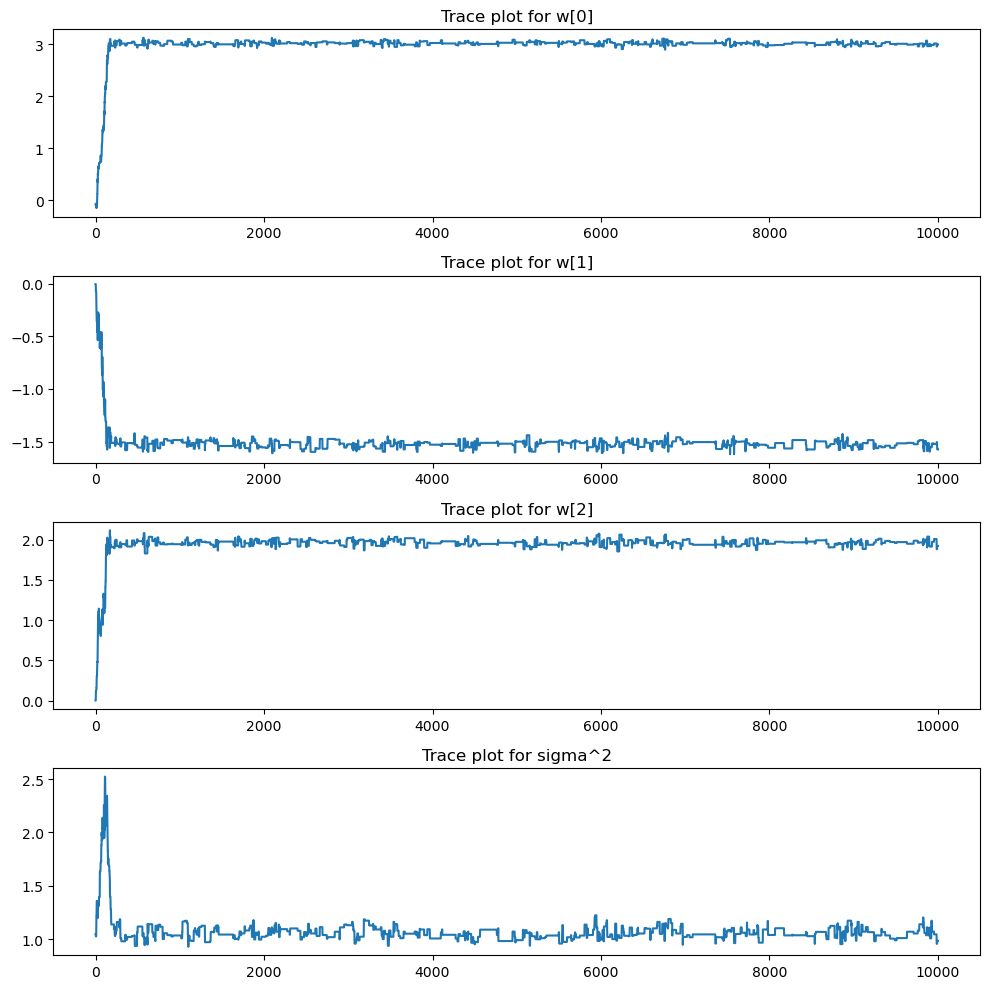

In [12]:
# Step 1: Generate synthetic data
np.random.seed(42)

# True parameters
w_true = np.array([3.0, -1.5, 2.0])
sigma2_true = 1.0  # True variance of the noise
N = 1000  # Number of data points
d = len(w_true)  # Number of features

# Generate synthetic dataset
X = np.random.randn(N, d)
epsilon = np.random.randn(N) * np.sqrt(sigma2_true)
y = X @ w_true + epsilon

# Step 2: Define Bayesian Linear Regression
# Prior for w ~ N(w_0, V_0) and sigma2 ~ Inv-Gamma(a_0, b_0)
w_0 = np.zeros(d)  # Prior mean of weights
V_0 = np.eye(d) * 10  # Prior variance of weights (diagonal for simplicity)
a_0 = 2.0  # Shape parameter of Inverse Gamma
b_0 = 1.0  # Scale parameter of Inverse Gamma

# Step 3: Metropolis-Hastings MCMC algorithm
def log_prior(w, sigma2):
    """Log-prior for weights and variance"""
    lp_w = norm.logpdf(w, w_0, np.sqrt(np.diag(V_0))).sum()
    lp_sigma2 = invgamma.logpdf(sigma2, a_0, scale=b_0)
    return lp_w + lp_sigma2

def log_likelihood(w, sigma2, X, y):
    """Log-likelihood of the data given parameters"""
    residuals = y - X @ w
    ll = -0.5 * N * np.log(2 * np.pi * sigma2) - (0.5 / sigma2) * (residuals ** 2).sum()
    return ll

def log_posterior(w, sigma2, X, y):
    """Log posterior = Log likelihood + Log prior"""
    return log_likelihood(w, sigma2, X, y) + log_prior(w, sigma2)

def metropolis_hastings(X, y, n_samples=5000, w_init=None, sigma2_init=1.0, step_size_w=0.1, step_size_sigma2=0.1):
    # Initial values
    w_current = np.copy(w_init)
    sigma2_current = sigma2_init

    samples_w = np.zeros((n_samples, d))
    samples_sigma2 = np.zeros(n_samples)
    
    accept_count = 0

    for i in range(n_samples):
        # Propose new weights
        w_proposal = w_current + np.random.randn(d) * step_size_w
        sigma2_proposal = sigma2_current + np.random.randn() * step_size_sigma2

        # Ensure sigma2 is positive
        if sigma2_proposal <= 0:
            continue
        
        # Compute log posterior for current and proposed states
        log_post_current = log_posterior(w_current, sigma2_current, X, y)
        log_post_proposal = log_posterior(w_proposal, sigma2_proposal, X, y)

        # Acceptance ratio
        log_accept_ratio = log_post_proposal - log_post_current
        if np.log(np.random.rand()) < log_accept_ratio:
            w_current = w_proposal
            sigma2_current = sigma2_proposal
            accept_count += 1

        # Store the samples
        samples_w[i] = w_current
        samples_sigma2[i] = sigma2_current

    acceptance_rate = accept_count / n_samples
    return samples_w, samples_sigma2, acceptance_rate

# Step 4: Run MCMC
n_samples = 10000
w_init = np.zeros(d)
sigma2_init = 1.0

samples_w, samples_sigma2, acceptance_rate = metropolis_hastings(X, y, n_samples, w_init, sigma2_init)

# Step 5: Analyze results
# Posterior mean and 95% credible intervals
w_mean = samples_w.mean(axis=0)
w_ci = np.percentile(samples_w, [2.5, 97.5], axis=0)
sigma2_mean = samples_sigma2.mean()
sigma2_ci = np.percentile(samples_sigma2, [2.5, 97.5])

print(f"True weights: {w_true}")
print(f"Estimated weights (mean): {w_mean}")
print(f"95% credible interval for weights: {w_ci}")
print(f"True noise variance: {sigma2_true}")
print(f"Estimated noise variance (mean): {sigma2_mean}")
print(f"95% credible interval for noise variance: {sigma2_ci}")
print(f"Acceptance rate: {acceptance_rate:.2f}")

# Plot the trace plots for w and sigma2
fig, axes = plt.subplots(d + 1, 1, figsize=(10, 10))

for i in range(d):
    axes[i].plot(samples_w[:, i])
    axes[i].set_title(f"Trace plot for w[{i}]")

axes[d].plot(samples_sigma2)
axes[d].set_title("Trace plot for sigma^2")

plt.tight_layout()
plt.show()


# OLS vs Bayesian probability

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import multivariate_normal

StatementMeta(, 7d34d3d5-0504-4201-b979-57c12775ba94, 3, Finished, Available, Finished)

StatementMeta(, 7d34d3d5-0504-4201-b979-57c12775ba94, 6, Finished, Available, Finished)

2024-09-26:19:34:42,390 WARNING  [tracking_store.py:153] log_inputs not supported


2024-09-26:19:34:46,838 WARNING  [tracking_store.py:153] log_inputs not supported


True weights: [ 3.  -1.5  2. ]
OLS Estimated weights: [ 2.98138484 -1.43394803  1.89933112]
Bayesian Estimated weights (posterior mean): [ 2.98007181 -1.43523796  1.90406128]
Bayesian 95% credible interval for weights: [[ 2.80613666  3.15400695]
 [-1.63342186 -1.23705405]
 [ 1.71713072  2.09099185]]


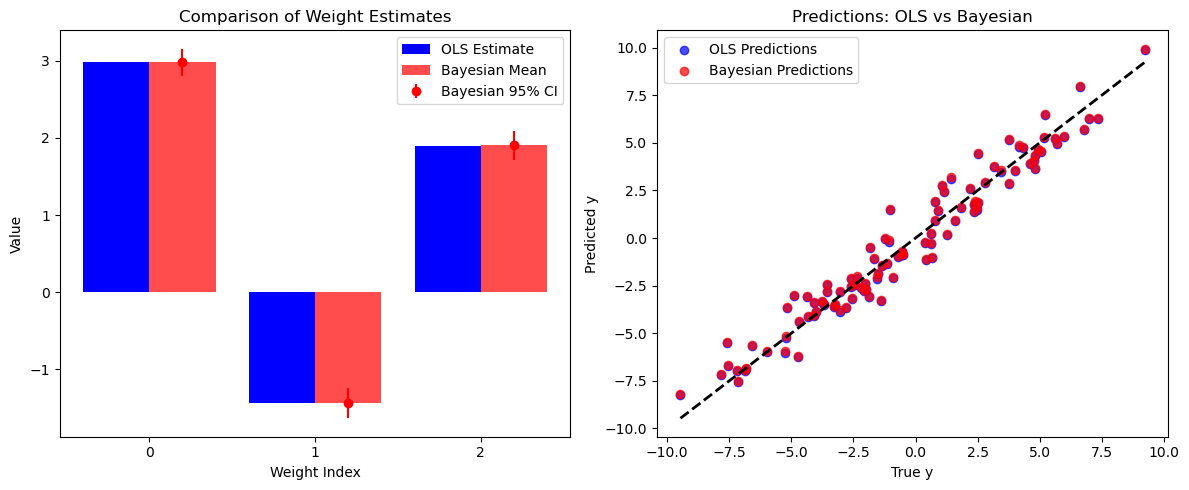

In [4]:

# Step 1: Generate synthetic data
# np.random.seed(2908)

# True parameters
w_true = np.array([3.0, -1.5, 2.0])  # True weights
sigma2_true = 1.0  # True variance of the noise
N = 100  # Number of data points
d = len(w_true)  # Number of features

# Generate input features and target variable
X = np.random.randn(N, d)
epsilon = np.random.randn(N) * np.sqrt(sigma2_true)
y = X @ w_true + epsilon

# Step 2: Fit OLS (Frequentist) Linear Regression
ols_model = LinearRegression()
ols_model.fit(X, y)

# Step 3: Fit Bayesian Linear Regression
# Prior for w ~ N(w_0, V_0)
w_0 = np.zeros(d)  # Prior mean
V_0 = np.eye(d) * 10  # Prior covariance (diagonal)

# Likelihood variance (assume known for simplicity)
sigma2_likelihood = sigma2_true

# Posterior covariance
V_n_inv = np.linalg.inv(V_0) + (X.T @ X) / sigma2_likelihood
V_n = np.linalg.inv(V_n_inv)

# Posterior mean
w_n = V_n @ (np.linalg.inv(V_0) @ w_0 + (X.T @ y) / sigma2_likelihood)

# Step 4: Predictions
# OLS Predictions
y_pred_ols = ols_model.predict(X)

# Bayesian Predictions
y_pred_bayes = X @ w_n

# 95% credible interval for Bayesian regression weights
w_std = np.sqrt(np.diag(V_n))
w_cred_interval = np.vstack((w_n - 1.96 * w_std, w_n + 1.96 * w_std)).T

# Step 5: Compare and visualize results
print("True weights:", w_true)
print("OLS Estimated weights:", ols_model.coef_)
print("Bayesian Estimated weights (posterior mean):", w_n)
print("Bayesian 95% credible interval for weights:", w_cred_interval)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot the weights
ax[0].bar(np.arange(d) - 0.2, ols_model.coef_, width=0.4, label="OLS Estimate", color='b')
ax[0].bar(np.arange(d) + 0.2, w_n, width=0.4, label="Bayesian Mean", color='r', alpha=0.7)
ax[0].errorbar(np.arange(d) + 0.2, w_n, yerr=1.96 * w_std, fmt='o', color='r', label="Bayesian 95% CI")
ax[0].set_xticks(np.arange(d))
ax[0].set_xlabel("Weight Index")
ax[0].set_ylabel("Value")
ax[0].set_title("Comparison of Weight Estimates")
ax[0].legend()

# Plot the predicted vs actual y values
ax[1].scatter(y, y_pred_ols, label="OLS Predictions", color='b', alpha=0.7)
ax[1].scatter(y, y_pred_bayes, label="Bayesian Predictions", color='r', alpha=0.7)
ax[1].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax[1].set_xlabel("True y")
ax[1].set_ylabel("Predicted y")
ax[1].set_title("Predictions: OLS vs Bayesian")
ax[1].legend()

plt.tight_layout()
plt.show()


StatementMeta(, 7d34d3d5-0504-4201-b979-57c12775ba94, 7, Finished, Available, Finished)

2024-09-26:19:36:48,916 WARNING  [tracking_store.py:153] log_inputs not supported


### Frequentist (OLS) Results ###
OLS Estimated Weights: [ 2.92233671 -1.54996355  1.89240669]

### Bayesian Results ###
Bayesian Estimated Weights (mean): [ 2.91204152 -1.55116174  1.89000343]
Bayesian 95% Credible Intervals for Weights: [[ 2.68596514 -1.73481836  1.74109423]
 [ 3.13881663 -1.35790601  2.06311879]]
Acceptance Rate: 0.35


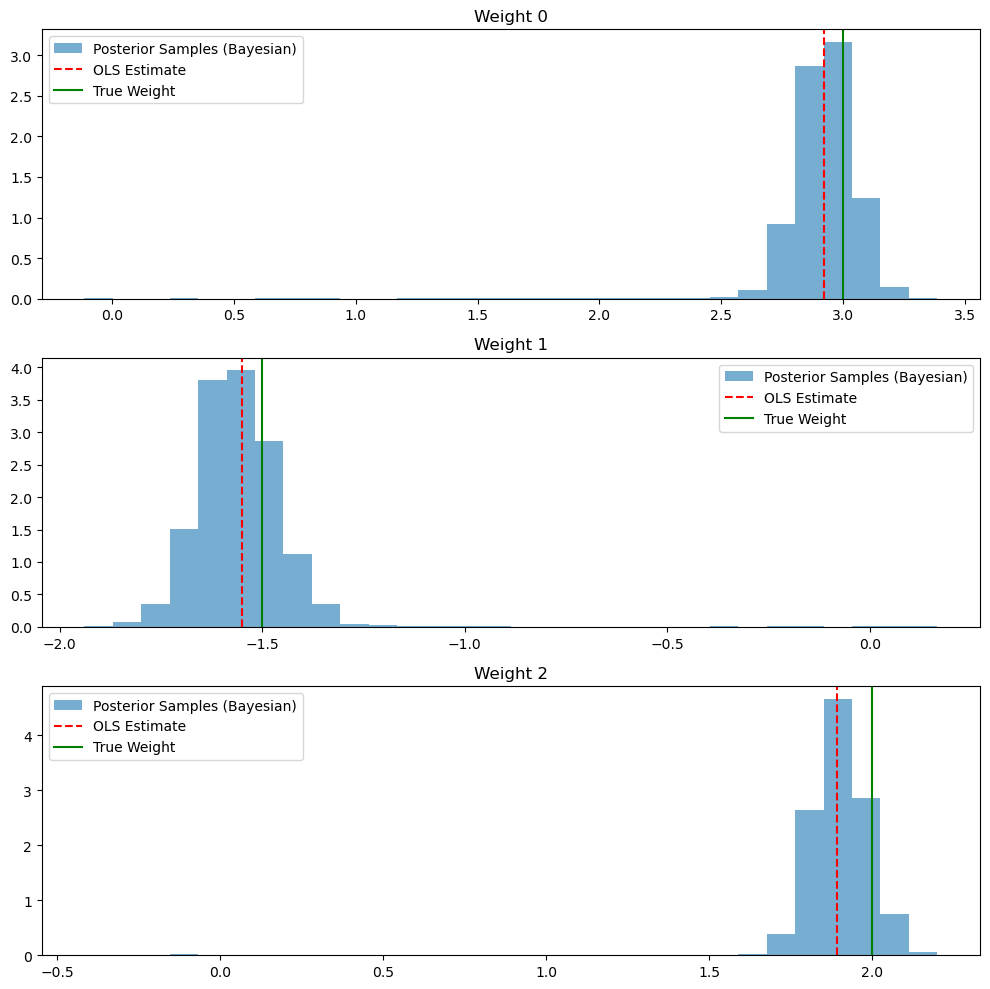

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import invgamma, norm

# Step 1: Generate synthetic data
np.random.seed(42)

# True parameters
w_true = np.array([3.0, -1.5, 2.0])
sigma2_true = 1.0  # True variance of the noise
N = 100  # Number of data points
d = len(w_true)  # Number of features

# Generate synthetic dataset
X = np.random.randn(N, d)
epsilon = np.random.randn(N) * np.sqrt(sigma2_true)
y = X @ w_true + epsilon

# Step 2: Frequentist Linear Regression (OLS) using scikit-learn
ols_model = LinearRegression()
ols_model.fit(X, y)
ols_weights = ols_model.coef_

# Step 3: Bayesian Linear Regression via MCMC (Metropolis-Hastings)

# Prior for weights ~ N(w_0, V_0), sigma^2 ~ Inv-Gamma(a_0, b_0)
w_0 = np.zeros(d)  # Prior mean of weights
V_0 = np.eye(d) * 10  # Prior covariance for weights
a_0 = 2.0  # Shape parameter of the inverse-gamma prior on sigma^2
b_0 = 1.0  # Scale parameter of the inverse-gamma prior on sigma^2

# Define likelihood, prior, and posterior functions
def log_prior(w, sigma2):
    lp_w = norm.logpdf(w, w_0, np.sqrt(np.diag(V_0))).sum()
    lp_sigma2 = invgamma.logpdf(sigma2, a_0, scale=b_0)
    return lp_w + lp_sigma2

def log_likelihood(w, sigma2, X, y):
    residuals = y - X @ w
    ll = -0.5 * N * np.log(2 * np.pi * sigma2) - (0.5 / sigma2) * (residuals ** 2).sum()
    return ll

def log_posterior(w, sigma2, X, y):
    return log_likelihood(w, sigma2, X, y) + log_prior(w, sigma2)

def metropolis_hastings(X, y, n_samples=5000, w_init=None, sigma2_init=1.0, step_size_w=0.1, step_size_sigma2=0.1):
    w_current = np.copy(w_init)
    sigma2_current = sigma2_init

    samples_w = np.zeros((n_samples, d))
    samples_sigma2 = np.zeros(n_samples)
    
    accept_count = 0

    for i in range(n_samples):
        w_proposal = w_current + np.random.randn(d) * step_size_w
        sigma2_proposal = sigma2_current + np.random.randn() * step_size_sigma2

        if sigma2_proposal <= 0:
            continue
        
        log_post_current = log_posterior(w_current, sigma2_current, X, y)
        log_post_proposal = log_posterior(w_proposal, sigma2_proposal, X, y)

        log_accept_ratio = log_post_proposal - log_post_current
        if np.log(np.random.rand()) < log_accept_ratio:
            w_current = w_proposal
            sigma2_current = sigma2_proposal
            accept_count += 1

        samples_w[i] = w_current
        samples_sigma2[i] = sigma2_current

    acceptance_rate = accept_count / n_samples
    return samples_w, samples_sigma2, acceptance_rate

# Step 4: Run Bayesian MCMC
n_samples = 10000
w_init = np.zeros(d)
sigma2_init = 1.0

samples_w, samples_sigma2, acceptance_rate = metropolis_hastings(X, y, n_samples, w_init, sigma2_init)

# Posterior mean for Bayesian weights
w_mean = samples_w.mean(axis=0)
w_ci = np.percentile(samples_w, [2.5, 97.5], axis=0)

# Step 5: Compare Results
print("### Frequentist (OLS) Results ###")
print(f"OLS Estimated Weights: {ols_weights}")

print("\n### Bayesian Results ###")
print(f"Bayesian Estimated Weights (mean): {w_mean}")
print(f"Bayesian 95% Credible Intervals for Weights: {w_ci}")
print(f"Acceptance Rate: {acceptance_rate:.2f}")

# Step 6: Plot results
fig, axes = plt.subplots(d, 1, figsize=(10, 10))

# Plot OLS vs Bayesian Posterior
for i in range(d):
    axes[i].hist(samples_w[:, i], bins=30, density=True, alpha=0.6, label='Posterior Samples (Bayesian)')
    axes[i].axvline(ols_weights[i], color='red', linestyle='--', label='OLS Estimate')
    axes[i].axvline(w_true[i], color='green', linestyle='-', label='True Weight')
    axes[i].set_title(f"Weight {i}")
    axes[i].legend()

plt.tight_layout()
plt.show()


Naive Bay. classification

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# Example dataset: Features and binary target
data = {'Feature1': [1, 0, 1, 0, 1],
        'Feature2': [0, 1, 0, 1, 1],
        'Spam': [1, 0, 1, 0, 1]}

df = pd.DataFrame(data)

# Train-test split
X = df[['Feature1', 'Feature2']]
y = df['Spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes accuracy:", accuracy)


StatementMeta(, 7d34d3d5-0504-4201-b979-57c12775ba94, 9, Finished, Available, Finished)

2024-09-26:19:41:46,476 WARNING  [tracking_store.py:153] log_inputs not supported


2024-09-26:19:41:51,896 WARNING  [tracking_store.py:153] log_inputs not supported


Naive Bayes accuracy: 1.0


MCM Chains

In [8]:
import numpy as np

# Transition matrix: rows and columns correspond to Sunny, Cloudy, Rainy
transition_matrix = np.array([[0.7, 0.2, 0.1],
                              [0.3, 0.4, 0.3],
                              [0.2, 0.3, 0.5]])

states = ['Sunny', 'Cloudy', 'Rainy']
current_state = 0  # Start with Sunny

# Simulate weather for 10 days
n_days = 10
weather_simulation = []
for _ in range(n_days):
    next_state = np.random.choice([0, 1, 2], p=transition_matrix[current_state])
    weather_simulation.append(states[next_state])
    current_state = next_state

print("Weather simulation for 10 days:", weather_simulation)


StatementMeta(, 7d34d3d5-0504-4201-b979-57c12775ba94, 10, Finished, Available, Finished)

Weather simulation for 10 days: ['Sunny', 'Cloudy', 'Rainy', 'Cloudy', 'Rainy', 'Rainy', 'Sunny', 'Sunny', 'Sunny', 'Cloudy']


Law of Large numbers

StatementMeta(, 7d34d3d5-0504-4201-b979-57c12775ba94, 14, Finished, Available, Finished)

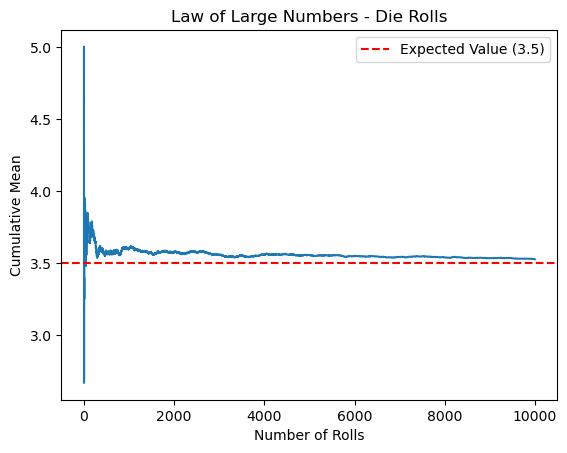

array([5, 2, 1, ..., 3, 4, 1])

In [12]:
import matplotlib.pyplot as plt

# Simulate rolling a die N times
N = 10000
die_rolls = np.random.randint(1, 7, size=N)

# Cumulative mean of the rolls
cumulative_mean = np.cumsum(die_rolls) / np.arange(1, N + 1)

# Plot the results
plt.plot(cumulative_mean)
plt.axhline(y=3.5, color='r', linestyle='--', label='Expected Value (3.5)')
plt.xlabel('Number of Rolls')
plt.ylabel('Cumulative Mean')
plt.title('Law of Large Numbers - Die Rolls')
plt.legend()
plt.show()

die_rolls

## Gaussian Mixture Models (GMM) for Clustering

Scenario: Use GMM to identify clusters in a dataset where the data is assumed to be generated from a mixture of several Gaussian distributions.

StatementMeta(, 7d34d3d5-0504-4201-b979-57c12775ba94, 16, Finished, Available, Finished)

2024-09-26:19:46:56,939 WARNING  [tracking_store.py:153] log_inputs not supported


2024-09-26:19:47:00,509 WARNING  [tracking_store.py:153] log_inputs not supported


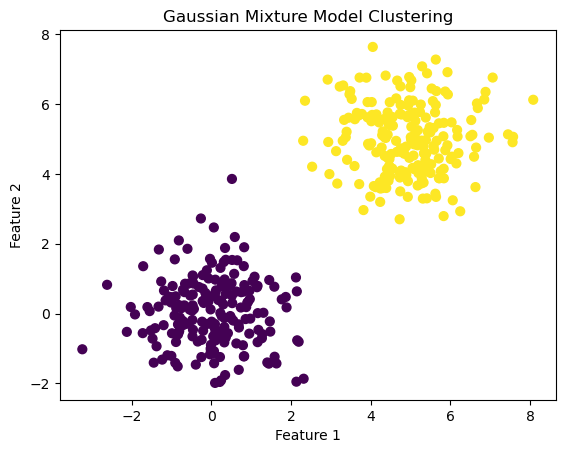

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Generate synthetic data from two Gaussian distributions
np.random.seed(42)
data1 = np.random.normal(loc=0, scale=1, size=(200, 2))
data2 = np.random.normal(loc=5, scale=1, size=(200, 2))
data = np.vstack((data1, data2))

# Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(data)
labels = gmm.predict(data)

# Plot the results
plt.scatter(data[:, 0], data[:, 1], c=labels, s=40, cmap='viridis')
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Clustering with GMM on Multi-Distribution Data

For different distribution:

- Feature 1: Normal distribution
- Feature 2: Uniform distribution
- Feature 3: Exponential distribution

StatementMeta(, 7d34d3d5-0504-4201-b979-57c12775ba94, 19, Finished, Available, Finished)

2024-09-26:19:51:06,531 WARNING  [tracking_store.py:153] log_inputs not supported


2024-09-26:19:51:10,125 WARNING  [tracking_store.py:153] log_inputs not supported


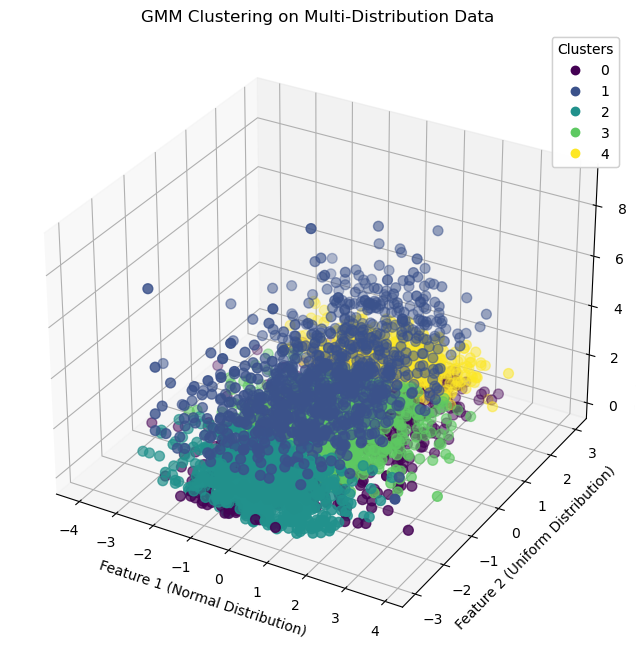

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Generate synthetic data
np.random.seed(2908)

# Number of samples
n_samples = 5000

# Generate data
feature_1 = np.random.normal(loc=0, scale=1, size=n_samples)  # Normal distribution
feature_2 = np.random.uniform(low=-3, high=3, size=n_samples)  # Uniform distribution
feature_3 = np.random.exponential(scale=1, size=n_samples)  # Exponential distribution

# Combine features into a DataFrame
data = pd.DataFrame({
    'Feature_1': feature_1,
    'Feature_2': feature_2,
    'Feature_3': feature_3
})

# Step 2: Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=5, random_state=2908)  # Assuming we want to find 5 clusters
gmm.fit(data)
labels = gmm.predict(data)

# Add labels to the DataFrame
data['Cluster'] = labels

# Visualize the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the clustered data
scatter = ax.scatter(data['Feature_1'], data['Feature_2'], data['Feature_3'], c=data['Cluster'], s=50, cmap='viridis')

# Set labels
ax.set_xlabel('Feature 1 (Normal Distribution)')
ax.set_ylabel('Feature 2 (Uniform Distribution)')
ax.set_zlabel('Feature 3 (Exponential Distribution)')
ax.set_title('GMM Clustering on Multi-Distribution Data')

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()


## GMM with PCA

StatementMeta(, 7d34d3d5-0504-4201-b979-57c12775ba94, 22, Finished, Available, Finished)

2024-09-26:19:54:28,667 WARNING  [tracking_store.py:153] log_inputs not supported


2024-09-26:19:54:32,475 WARNING  [tracking_store.py:153] log_inputs not supported
2024-09-26:19:54:33,47 WARNING  [tracking_store.py:153] log_inputs not supported


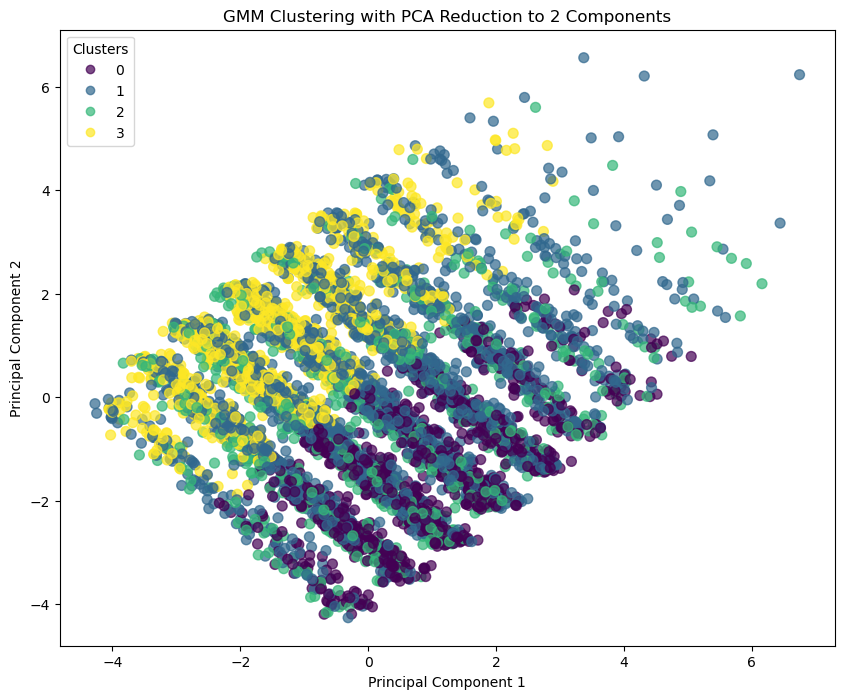

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Generate synthetic data
np.random.seed(2908)

# Number of samples
n_samples = 5000

# Generate data
feature_1 = np.random.normal(loc=0, scale=1, size=n_samples)    # Normal distribution
feature_2 = np.random.uniform(low=-3, high=3, size=n_samples)    # Uniform distribution
feature_3 = np.random.exponential(scale=1, size=n_samples)       # Exponential distribution
feature_4 = np.random.poisson(lam=3, size=n_samples)             # Poisson distribution
feature_5 = np.random.binomial(n=10, p=0.5, size=n_samples)      # Binomial distribution

# Combine features into a DataFrame
data = pd.DataFrame({
    'Feature_1': feature_1,
    'Feature_2': feature_2,
    'Feature_3': feature_3,
    'Feature_4': feature_4,
    'Feature_5': feature_5
})

# Step 2: Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, random_state=2908)  # Fit for 4 clusters
gmm.fit(data)
labels = gmm.predict(data)

# Add labels to the DataFrame
data['Cluster'] = labels

# Step 3: Use PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data.drop('Cluster', axis=1))

# Create a new DataFrame for PCA results
pca_df = pd.DataFrame(data_reduced, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels

# Visualize the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], s=50, cmap='viridis', alpha=0.7)

# Set labels and title
plt.title('GMM Clustering with PCA Reduction to 2 Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add legend
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
legend1
#plt.add_artist(legend1)

plt.show()


StatementMeta(, 7d34d3d5-0504-4201-b979-57c12775ba94, 24, Finished, Available, Finished)

2024-09-26:19:55:56,237 WARNING  [tracking_store.py:153] log_inputs not supported


2024-09-26:19:55:59,801 WARNING  [tracking_store.py:153] log_inputs not supported
2024-09-26:19:56:00,376 WARNING  [tracking_store.py:153] log_inputs not supported


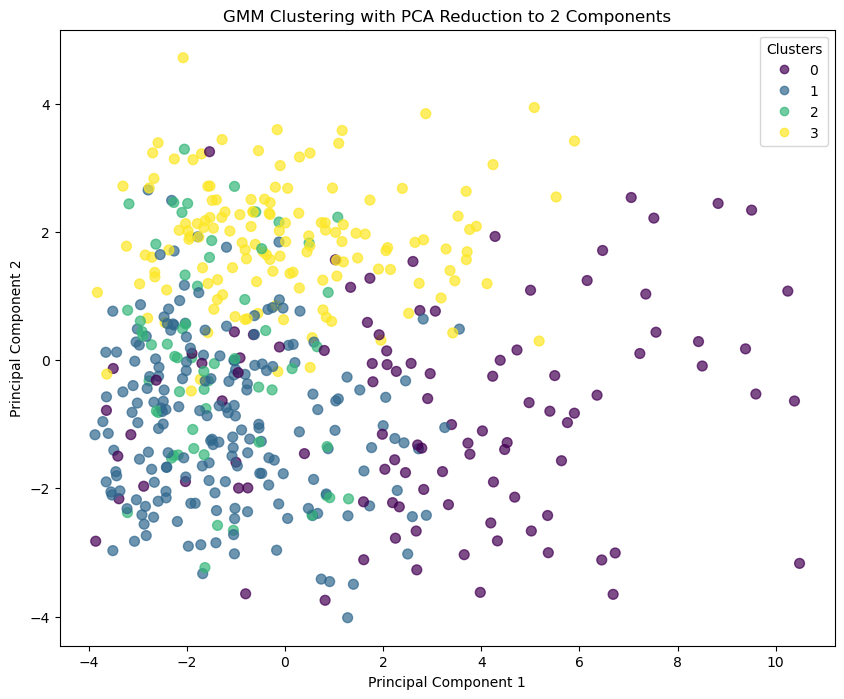

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

# Step 1: Generate synthetic data
np.random.seed(42)

# Number of samples
n_samples = 500

# Generate data
feature_1 = np.random.normal(loc=0, scale=1, size=n_samples)      # Normal distribution
feature_2 = np.random.uniform(low=-3, high=3, size=n_samples)      # Uniform distribution
feature_3 = np.random.exponential(scale=1, size=n_samples)         # Exponential distribution
feature_4 = np.random.poisson(lam=3, size=n_samples)               # Poisson distribution
feature_5 = np.random.binomial(n=10, p=0.5, size=n_samples)        # Binomial distribution
feature_6 = np.random.lognormal(mean=0, sigma=0.5, size=n_samples) # Log-Normal distribution
feature_7 = np.random.gamma(shape=2, scale=2, size=n_samples)      # Gamma distribution
feature_8 = np.random.beta(a=2, b=5, size=n_samples)               # Beta distribution

# Combine features into a DataFrame
data = pd.DataFrame({
    'Feature_1': feature_1,
    'Feature_2': feature_2,
    'Feature_3': feature_3,
    'Feature_4': feature_4,
    'Feature_5': feature_5,
    'Feature_6': feature_6,
    'Feature_7': feature_7,
    'Feature_8': feature_8
})

# Step 2: Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, random_state=42)  # Fit for 4 clusters
gmm.fit(data)
labels = gmm.predict(data)

# Add labels to the DataFrame
data['Cluster'] = labels

# Step 3: Use PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data.drop('Cluster', axis=1))

# Create a new DataFrame for PCA results
pca_df = pd.DataFrame(data_reduced, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels

# Visualize the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], s=50, cmap='viridis', alpha=0.7)

# Set labels and title
plt.title('GMM Clustering with PCA Reduction to 2 Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add legend
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
#plt.add_artist(legend1)

plt.show()


StatementMeta(, 7d34d3d5-0504-4201-b979-57c12775ba94, 26, Finished, Available, Finished)

2024-09-26:19:56:57,802 WARNING  [tracking_store.py:153] log_inputs not supported


2024-09-26:19:57:01,127 WARNING  [tracking_store.py:153] log_inputs not supported
2024-09-26:19:57:01,653 WARNING  [tracking_store.py:153] log_inputs not supported


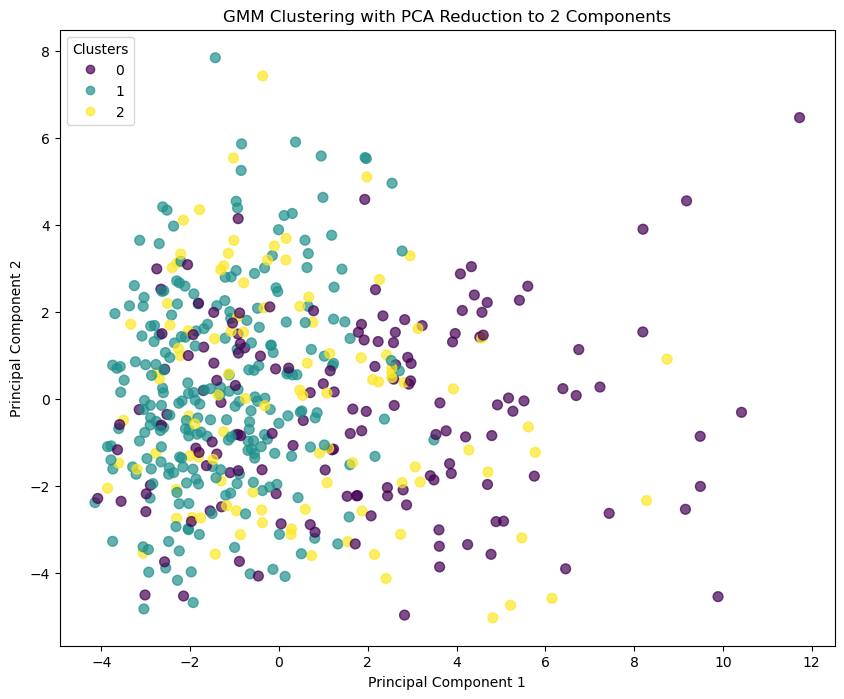

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

# Step 1: Generate synthetic data
np.random.seed(42)

# Number of samples
n_samples = 500

# Generate data with various distributions
feature_1 = np.random.normal(loc=0, scale=1, size=n_samples)      # Normal distribution
feature_2 = np.random.uniform(low=-3, high=3, size=n_samples)      # Uniform distribution
feature_3 = np.random.exponential(scale=1, size=n_samples)         # Exponential distribution
feature_4 = np.random.poisson(lam=3, size=n_samples)               # Poisson distribution
feature_5 = np.random.binomial(n=10, p=0.5, size=n_samples)        # Binomial distribution
feature_6 = np.random.lognormal(mean=0, sigma=0.5, size=n_samples) # Log-Normal distribution
feature_7 = np.random.gamma(shape=2, scale=2, size=n_samples)      # Gamma distribution
feature_8 = np.random.beta(a=2, b=5, size=n_samples)               # Beta distribution
feature_9 = np.random.normal(loc=5, scale=2, size=n_samples)       # Normal distribution (different parameters)
feature_10 = np.random.uniform(low=1, high=5, size=n_samples)      # Uniform distribution (different range)
feature_11 = np.random.exponential(scale=2, size=n_samples)        # Exponential distribution (different scale)
feature_12 = np.random.poisson(lam=5, size=n_samples)              # Poisson distribution (different lambda)

# Combine features into a DataFrame
data = pd.DataFrame({
    'Feature_1': feature_1,
    'Feature_2': feature_2,
    'Feature_3': feature_3,
    'Feature_4': feature_4,
    'Feature_5': feature_5,
    'Feature_6': feature_6,
    'Feature_7': feature_7,
    'Feature_8': feature_8,
    'Feature_9': feature_9,
    'Feature_10': feature_10,
    'Feature_11': feature_11,
    'Feature_12': feature_12
})

# Step 2: Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)  # Fit for 4 clusters
gmm.fit(data)
labels = gmm.predict(data)

# Add labels to the DataFrame
data['Cluster'] = labels

# Step 3: Use PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data.drop('Cluster', axis=1))

# Create a new DataFrame for PCA results
pca_df = pd.DataFrame(data_reduced, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels

# Visualize the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], s=50, cmap='viridis', alpha=0.7)

# Set labels and title
plt.title('GMM Clustering with PCA Reduction to 2 Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add legend
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
#plt.add_artist(legend1)

plt.show()


-----


StatementMeta(, 7d34d3d5-0504-4201-b979-57c12775ba94, 28, Finished, Available, Finished)

2024-09-26:20:02:25,209 WARNING  [tracking_store.py:153] log_inputs not supported


2024-09-26:20:02:29,264 WARNING  [tracking_store.py:153] log_inputs not supported
2024-09-26:20:02:29,788 WARNING  [tracking_store.py:153] log_inputs not supported


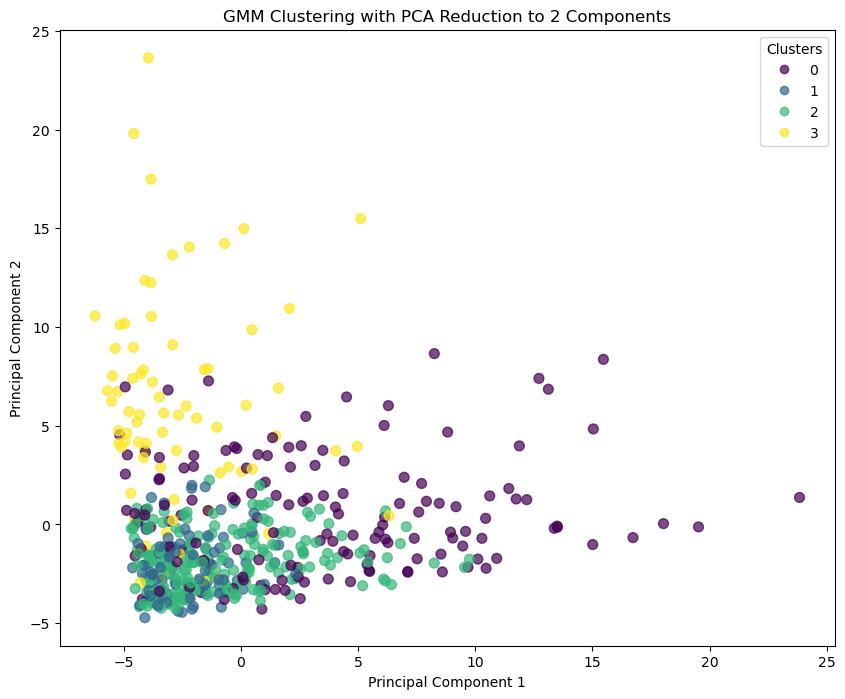

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

# Step 1: Generate synthetic data
np.random.seed(42)

# Number of samples
n_samples = 500

# Generate data
# Binomial features
feature_1 = np.random.binomial(n=10, p=0.1, size=n_samples)
feature_2 = np.random.binomial(n=10, p=0.5, size=n_samples)
feature_3 = np.random.binomial(n=10, p=0.7, size=n_samples)
feature_4 = np.random.binomial(n=10, p=0.9, size=n_samples)
feature_5 = np.random.binomial(n=20, p=0.5, size=n_samples)

# Normal features
feature_6 = np.random.normal(loc=0, scale=1, size=n_samples)
feature_7 = np.random.normal(loc=5, scale=2, size=n_samples)
feature_8 = np.random.normal(loc=-2, scale=0.5, size=n_samples)
feature_9 = np.random.normal(loc=3, scale=1.5, size=n_samples)
feature_10 = np.random.normal(loc=10, scale=3, size=n_samples)

# Exponential features
feature_11 = np.random.exponential(scale=1, size=n_samples)
feature_12 = np.random.exponential(scale=2, size=n_samples)
feature_13 = np.random.exponential(scale=3, size=n_samples)
feature_14 = np.random.exponential(scale=4, size=n_samples)
feature_15 = np.random.exponential(scale=5, size=n_samples)

# Combine features into a DataFrame
data = pd.DataFrame({
    'Feature_1': feature_1,
    'Feature_2': feature_2,
    'Feature_3': feature_3,
    'Feature_4': feature_4,
    'Feature_5': feature_5,
    'Feature_6': feature_6,
    'Feature_7': feature_7,
    'Feature_8': feature_8,
    'Feature_9': feature_9,
    'Feature_10': feature_10,
    'Feature_11': feature_11,
    'Feature_12': feature_12,
    'Feature_13': feature_13,
    'Feature_14': feature_14,
    'Feature_15': feature_15
})

# Step 2: Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, random_state=42)  # Fit for 4 clusters
gmm.fit(data)
labels = gmm.predict(data)

# Add labels to the DataFrame
data['Cluster'] = labels

# Step 3: Use PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data.drop('Cluster', axis=1))

# Create a new DataFrame for PCA results
pca_df = pd.DataFrame(data_reduced, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels

# Visualize the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], s=50, cmap='viridis', alpha=0.7)

# Set labels and title
plt.title('GMM Clustering with PCA Reduction to 2 Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add legend
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
# plt.add_artist(legend1)

plt.show()


StatementMeta(, 7d34d3d5-0504-4201-b979-57c12775ba94, 32, Finished, Available, Finished)

2024-09-26:20:07:14,817 WARNING  [tracking_store.py:153] log_inputs not supported


2024-09-26:20:07:18,954 WARNING  [tracking_store.py:153] log_inputs not supported


2024-09-26:20:07:22,243 WARNING  [tracking_store.py:153] log_inputs not supported


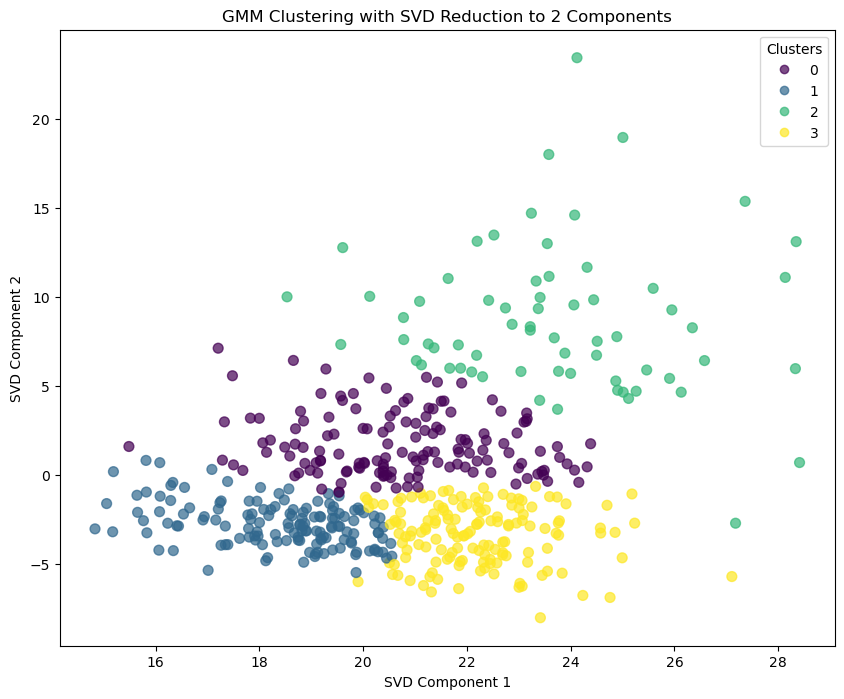

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15
0,1,6,8,9,9,0.521122,5.964498,-2.264489,3.235041,10.147925,1.353572,1.733913,0.278891,5.878245,0.374854
1,3,5,7,9,8,0.645216,2.524675,-2.528279,4.535296,12.306519,1.124641,1.554002,6.007330,0.439078,0.797635
2,1,4,5,10,13,0.555604,6.738312,-1.388458,3.262930,8.175320,0.230523,0.103267,1.159724,13.119317,0.380333
3,1,6,6,10,8,0.089581,6.774582,-2.129427,0.994912,11.089347,0.434607,0.129947,0.589255,8.837132,8.365013
4,0,6,6,9,9,-0.197338,3.473428,-1.823748,2.382265,10.933330,0.134801,0.414902,0.820824,1.260754,6.979890


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import TruncatedSVD

# Step 1: Generate synthetic data
np.random.seed(42)

# Number of samples
n_samples = 500

# Generate data with various distributions
# Binomial features
feature_1 = np.random.binomial(n=10, p=0.1, size=n_samples)
feature_2 = np.random.binomial(n=10, p=0.5, size=n_samples)
feature_3 = np.random.binomial(n=10, p=0.7, size=n_samples)
feature_4 = np.random.binomial(n=10, p=0.9, size=n_samples)
feature_5 = np.random.binomial(n=20, p=0.5, size=n_samples)

# Normal features
feature_6 = np.random.normal(loc=0, scale=1, size=n_samples)
feature_7 = np.random.normal(loc=5, scale=2, size=n_samples)
feature_8 = np.random.normal(loc=-2, scale=0.5, size=n_samples)
feature_9 = np.random.normal(loc=3, scale=1.5, size=n_samples)
feature_10 = np.random.normal(loc=10, scale=3, size=n_samples)

# Exponential features
feature_11 = np.random.exponential(scale=1, size=n_samples)
feature_12 = np.random.exponential(scale=2, size=n_samples)
feature_13 = np.random.exponential(scale=3, size=n_samples)
feature_14 = np.random.exponential(scale=4, size=n_samples)
feature_15 = np.random.exponential(scale=5, size=n_samples)

# Combine features into a DataFrame
data = pd.DataFrame({
    'Feature_1': feature_1,
    'Feature_2': feature_2,
    'Feature_3': feature_3,
    'Feature_4': feature_4,
    'Feature_5': feature_5,
    'Feature_6': feature_6,
    'Feature_7': feature_7,
    'Feature_8': feature_8,
    'Feature_9': feature_9,
    'Feature_10': feature_10,
    'Feature_11': feature_11,
    'Feature_12': feature_12,
    'Feature_13': feature_13,
    'Feature_14': feature_14,
    'Feature_15': feature_15
})

# Step 2: Apply SVD for dimensionality reduction
svd = TruncatedSVD(n_components=2)  # Reduce to 2 dimensions
data_reduced = svd.fit_transform(data)

# Step 3: Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, random_state=42)  # Fit for 4 clusters
gmm.fit(data_reduced)
labels = gmm.predict(data_reduced)

# Add labels to the reduced DataFrame
svd_df = pd.DataFrame(data_reduced, columns=['SVD_1', 'SVD_2'])
svd_df['Cluster'] = labels

# Step 4: Visualize the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(svd_df['SVD_1'], svd_df['SVD_2'], c=svd_df['Cluster'], s=50, cmap='viridis', alpha=0.7)

# Set labels and title
plt.title('GMM Clustering with SVD Reduction to 2 Components')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')

# Add legend
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
# plt.add_artist(legend1)

plt.show()


data.head()


In [31]:
feature_1

StatementMeta(, 7d34d3d5-0504-4201-b979-57c12775ba94, 33, Finished, Available, Finished)

array([1, 3, 1, 1, 0, 0, 0, 2, 1, 1, 0, 3, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 3, 3, 2, 0, 0, 1, 1, 0, 1, 0, 2,
       0, 1, 0, 1, 1, 0, 3, 2, 3, 2, 1, 2, 0, 0, 0, 0, 1, 0, 2, 1, 0, 1,
       0, 2, 0, 3, 2, 0, 0, 2, 1, 1, 2, 0, 1, 0, 2, 1, 0, 0, 0, 0, 1, 1,
       2, 1, 0, 1, 2, 1, 2, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 0,
       0, 0, 2, 2, 1, 2, 2, 0, 2, 1, 2, 2, 0, 0, 0, 1, 2, 2, 0, 1, 1, 0,
       0, 0, 3, 0, 1, 1, 1, 3, 3, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1,
       3, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 3, 0, 0, 0, 2, 2, 0, 1, 2, 1, 1, 0, 0, 2, 2, 1, 0, 1, 1, 2,
       2, 2, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2,
       1, 1, 0, 1, 0, 0, 3, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 0, 3, 3,
       2, 1, 0, 2, 1, 3, 3, 2, 0, 1, 2, 0, 0, 1, 3, 1, 1, 0, 1, 4, 0, 1,
       2, 2, 1, 1, 1, 0, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 0, 0,

## Statistical Process Control (SPC) with Control Charts

Scenario: Monitor a manufacturing process by using control charts to detect any unusual variation in the process.

StatementMeta(, 7d34d3d5-0504-4201-b979-57c12775ba94, 17, Finished, Available, Finished)

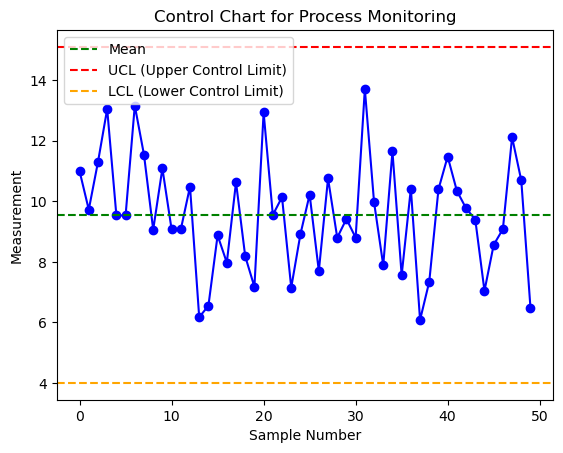

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated process data (mean = 10, standard deviation = 2)
np.random.seed(42)
data = np.random.normal(loc=10, scale=2, size=50)

# Control limits
mean = np.mean(data)
std_dev = np.std(data)
UCL = mean + 3 * std_dev
LCL = mean - 3 * std_dev

# Plot the control chart
plt.plot(data, marker='o', linestyle='-', color='b')
plt.axhline(mean, color='green', linestyle='--', label='Mean')
plt.axhline(UCL, color='red', linestyle='--', label='UCL (Upper Control Limit)')
plt.axhline(LCL, color='orange', linestyle='--', label='LCL (Lower Control Limit)')
plt.title('Control Chart for Process Monitoring')
plt.xlabel('Sample Number')
plt.ylabel('Measurement')
plt.legend()
plt.show()
